In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [3]:
file_path = '9_Dados Fórum- Estupro + Estupro de Vulneravel.xlsx'
df = pd.read_excel(file_path, sheet_name='ESTUPRO_ESTUPRO DE VULNERÁVEL')
df.head()


,GRUPO NATUREZA,VITIMA,IDADE (VIT),SEXO (VIT),COR (VIT),ESCOLARIDADE,BAIRRO (residencia),BO,DATA_OCORRENCIA,BAIRRO_OCORRENCIA,...,MUNICIPIO_OCORRENCIA,TIPO_LOCAL_OCORRENCIA,UNIDADE DE REGISTRO,DELEGACIA MULHER,AUTORIA_CONHECIDA,id_autor,IDADE (AUT),RAÇA_COR (AUT),SEXO (AUT),RELACIONAMENTO_AUTOR
0,ESTUPRO,26006779,48.0,FEM,PAR,NaN,Lavanderia,128/2024,2024-01-01,LAVANDERIA,...,Valença do Piauí,Residência,Seccional Valença - Divisão Especializada no A...,Sim,Sim,26006778.0,46.0,PAR,MAS,NaN
1,ESTUPRO,26020882,51.0,FEM,PRE,NaN,AGUA BRANCA,550/2024,2024-01-02,AGUÁ BRANCA,...,Uruçuí,Residência,Seccional Uruçuí - Central de Flagrantes,Não,Sim,26021003.0,49.0,PAR,MAS,NaN
2,ESTUPRO DE VULNERÁVEL,26024616,13.0,FEM,PAR,FIN,Acampamento,49/2024,2024-01-01,ACAMPAMENTO,...,Buriti dos Lopes,Via Pública,2ª Seccional Parnaíba - Delegacia de Polícia d...,Não,NaN,NaN,NaN,NaN,NaN,NaN
3,ESTUPRO,26097989,37.0,FEM,NaN,NaN,Zona rural - Pov. Tanque Velho,2434/2024,2024-01-04,ALTAMIRA,...,São Raimundo Nonato,Via Pública,Seccional São Raimundo Nonato - Delegacia Espe...,Sim,NaN,NaN,NaN,NaN,NaN,NaN
4,ESTUPRO,26110535,20.0,FEM,PAR,MIN,Zona Rural,2664/2024,2024-01-04,ZONA RURAL,...,Capitão de Campos,Residência,Seccional Campo Maior - Delegacia Especializad...,Sim,Sim,26110534.0,41.0,PAR,MAS,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GRUPO NATUREZA         1544 non-null   object        
 1   VITIMA                 1544 non-null   int64         
 2   IDADE (VIT)            1533 non-null   float64       
 3   SEXO (VIT)             1514 non-null   object        
 4   COR (VIT)              1048 non-null   object        
 5   ESCOLARIDADE           287 non-null    object        
 6   BAIRRO (residencia)    1305 non-null   object        
 7   BO                     1544 non-null   object        
 8   DATA_OCORRENCIA        1544 non-null   datetime64[ns]
 9   BAIRRO_OCORRENCIA      1403 non-null   object        
 10  HORA_OCORRENCIA        1544 non-null   int64         
 11  MUNICIPIO_OCORRENCIA   1544 non-null   object        
 12  TIPO_LOCAL_OCORRENCIA  1544 non-null   object        
 13  UNI

In [5]:
df.describe()

,VITIMA,IDADE (VIT),DATA_OCORRENCIA,HORA_OCORRENCIA,id_autor,IDADE (AUT)
count,1.544000e+03,1533.000000,1544,1544.000000,1.302000e+03,1218.000000
mean,3.239074e+07,15.560339,2024-06-28 13:15:32.642487040,12.523964,3.238634e+07,35.731527
min,2.600678e+07,0.000000,2024-01-01 00:00:00,0.000000,2.600678e+07,2.000000
25%,2.977531e+07,10.000000,2024-04-08 00:00:00,9.000000,2.976829e+07,22.000000
50%,3.236147e+07,13.000000,2024-06-21 00:00:00,12.000000,3.233727e+07,35.000000
75%,3.523926e+07,16.000000,2024-10-01 00:00:00,17.000000,3.533132e+07,46.000000
max,3.907597e+07,92.000000,2024-12-31 00:00:00,23.000000,3.907603e+07,88.000000
std,3.306718e+06,11.452754,NaN,5.991629,3.330674e+06,15.743612


In [6]:
df.isnull().sum()

GRUPO NATUREZA              0
VITIMA                      0
IDADE (VIT)                11
SEXO (VIT)                 30
COR (VIT)                 496
ESCOLARIDADE             1257
BAIRRO (residencia)       239
BO                          0
DATA_OCORRENCIA             0
BAIRRO_OCORRENCIA         141
HORA_OCORRENCIA             0
MUNICIPIO_OCORRENCIA        0
TIPO_LOCAL_OCORRENCIA       0
UNIDADE DE REGISTRO         3
DELEGACIA MULHER            0
AUTORIA_CONHECIDA         242
id_autor                  242
IDADE (AUT)               326
RAÇA_COR (AUT)            771
SEXO (AUT)                335
RELACIONAMENTO_AUTOR     1521
dtype: int64

In [7]:
df = df.drop_duplicates()

In [9]:
df['COR (VIT)'] = df['COR (VIT)'].fillna('NÃO INFORMADO')
df['ESCOLARIDADE'] = df['ESCOLARIDADE'].fillna('NÃO INFORMADO')
df['AUTORIA_CONHECIDA'] = df['AUTORIA_CONHECIDA'].fillna('NÃO INFORMADO')

In [10]:
df['GRUPO NATUREZA'].value_counts()

GRUPO NATUREZA
ESTUPRO DE VULNERÁVEL    1207
ESTUPRO                   260
Name: count, dtype: int64

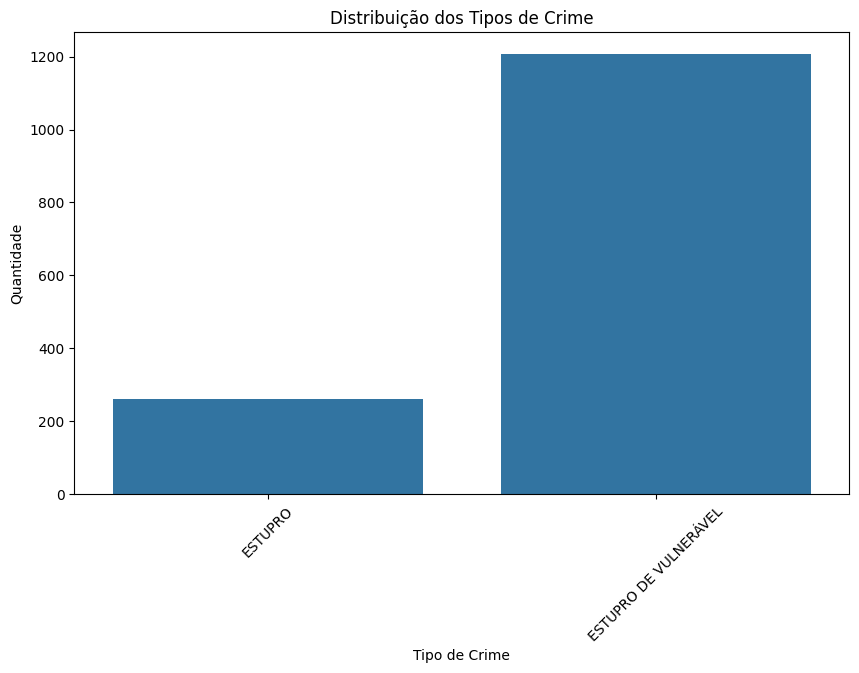

In [11]:
sns.countplot(x='GRUPO NATUREZA', data=df)
plt.title('Distribuição dos Tipos de Crime')
plt.xlabel('Tipo de Crime')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

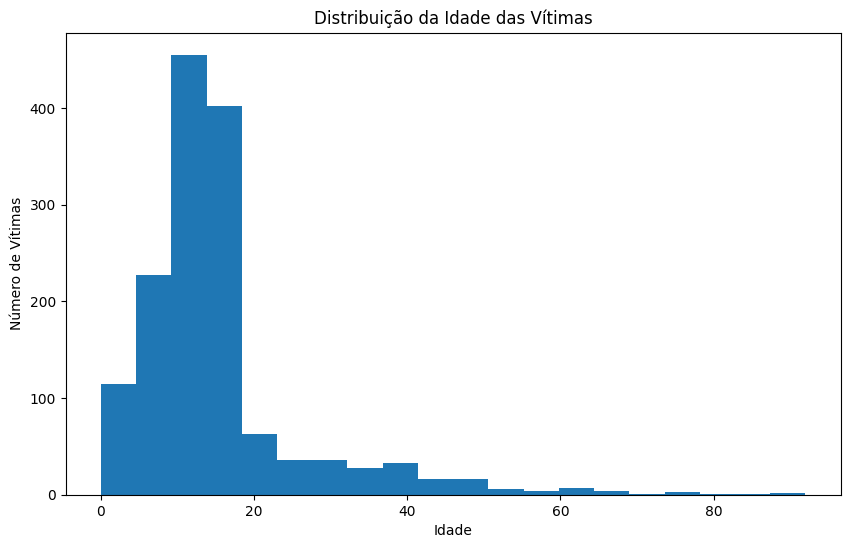

In [12]:
df['IDADE (VIT)'].plot(kind='hist', bins=20)
plt.title('Distribuição da Idade das Vítimas')
plt.xlabel('Idade')
plt.ylabel('Número de Vítimas')
plt.show()

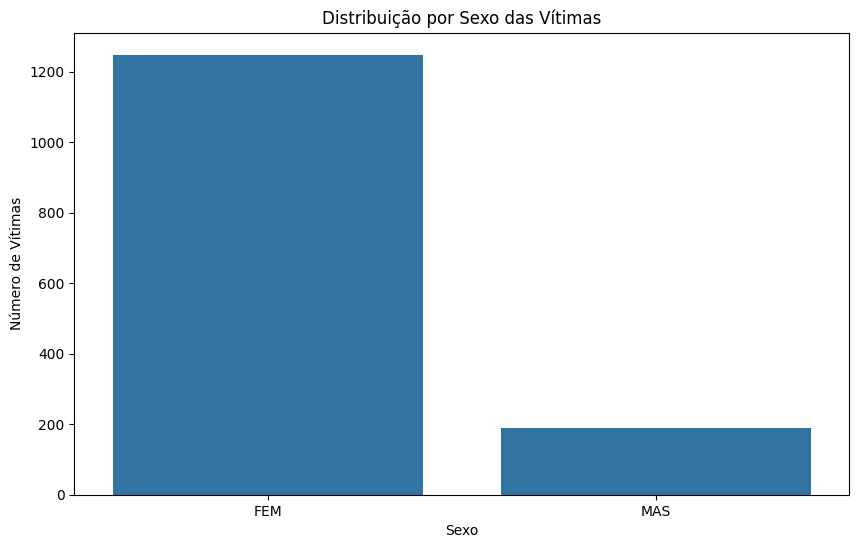

In [14]:
sns.countplot(x='SEXO (VIT)', data=df)
plt.title('Distribuição por Sexo das Vítimas')
plt.xlabel('Sexo')
plt.ylabel('Número de Vítimas')
plt.show()


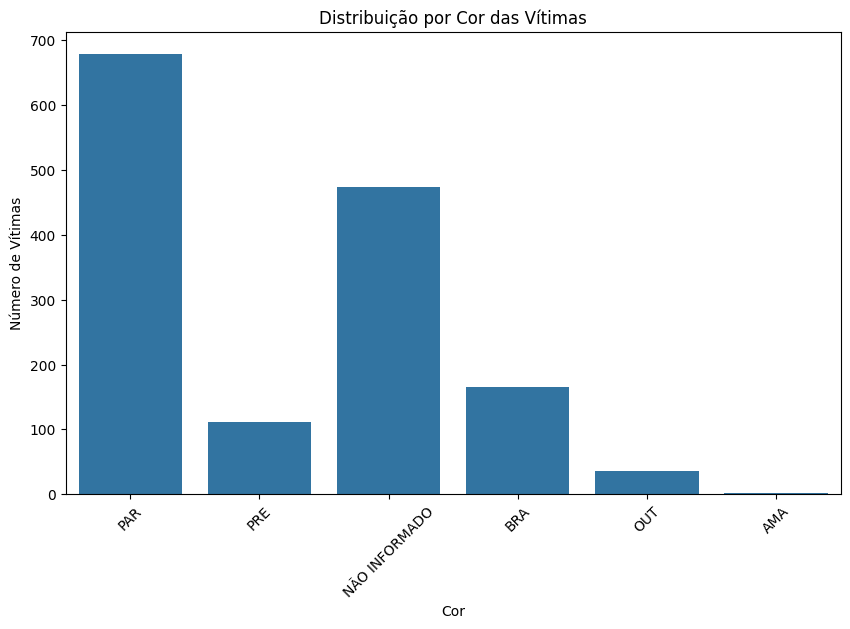

In [15]:
sns.countplot(x='COR (VIT)', data=df)
plt.title('Distribuição por Cor das Vítimas')
plt.xlabel('Cor')
plt.ylabel('Número de Vítimas')
plt.xticks(rotation=45)
plt.show()

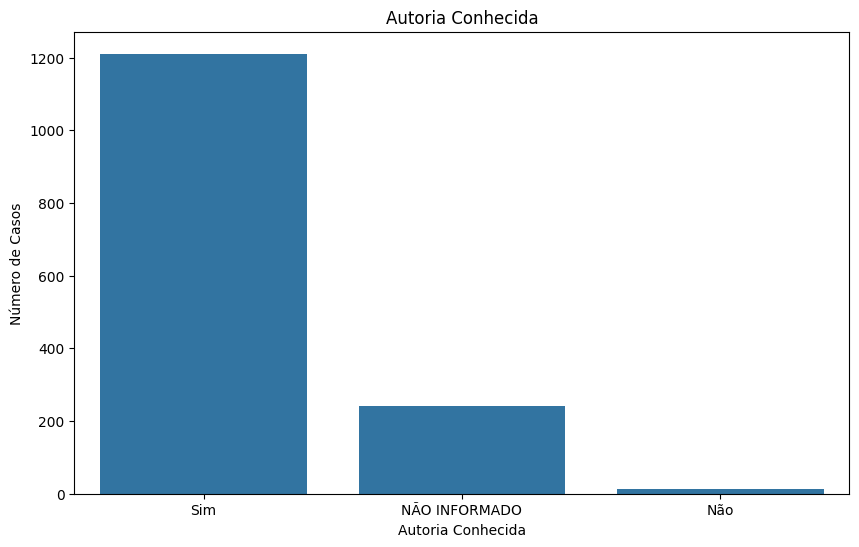

In [16]:
sns.countplot(x='AUTORIA_CONHECIDA', data=df)
plt.title('Autoria Conhecida')
plt.xlabel('Autoria Conhecida')
plt.ylabel('Número de Casos')
plt.show()


In [17]:
df['BAIRRO_OCORRENCIA'].value_counts().head(10)

BAIRRO_OCORRENCIA
ZONA RURAL       266
CENTRO           237
RURAL             28
URBANO            17
NÃO SE APLICA     13
MATADOURO         12
SANTO ANTÔNIO     11
SANTA MARIA       11
SÃO FRANCISCO     10
BELA VISTA        10
Name: count, dtype: int64

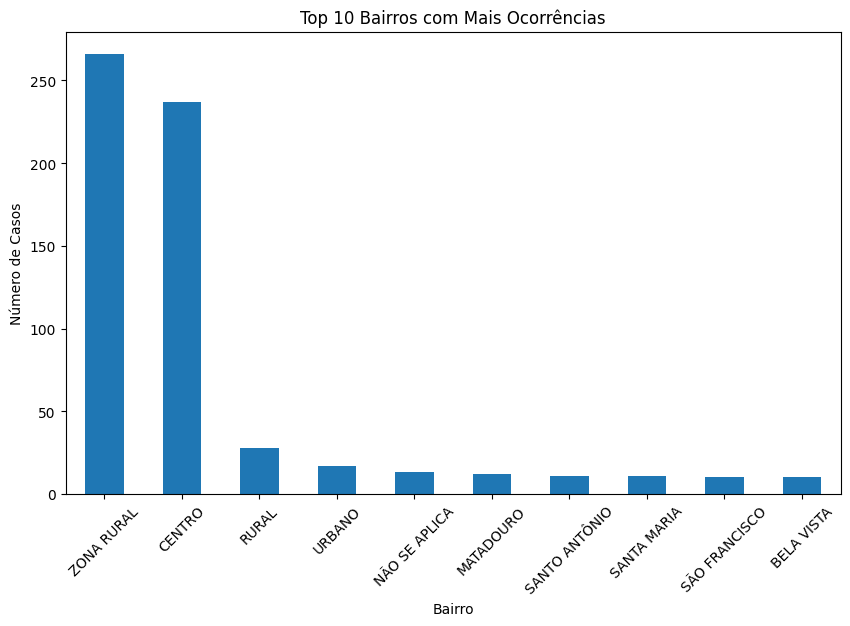

In [18]:
df['BAIRRO_OCORRENCIA'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Bairros com Mais Ocorrências')
plt.xlabel('Bairro')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.show()

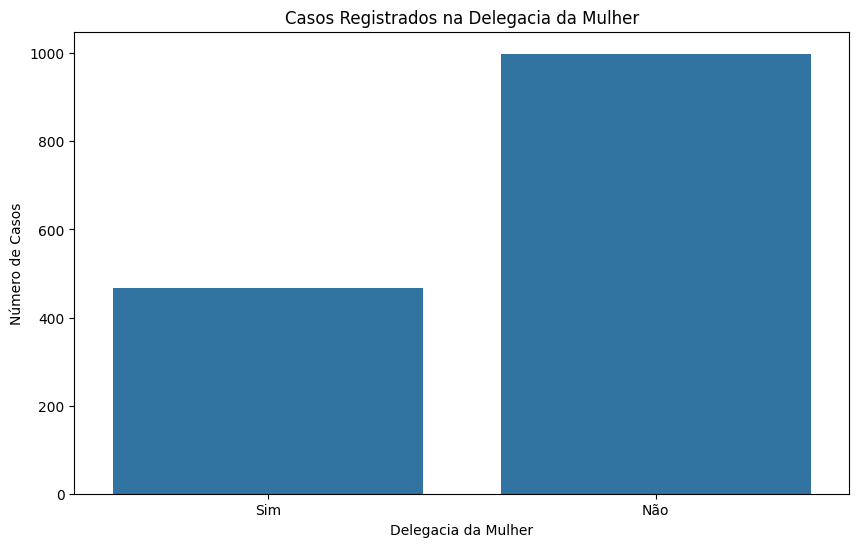

In [19]:
sns.countplot(x='DELEGACIA MULHER', data=df)
plt.title('Casos Registrados na Delegacia da Mulher')
plt.xlabel('Delegacia da Mulher')
plt.ylabel('Número de Casos')
plt.show()
